In [136]:
# importo librerías
import pandas as pd
import numpy as np
import os as os
import seaborn as sns
import matplotlib as mpl
import datetime as dt
import calendar # idem
import matplotlib.pyplot as plt

%matplotlib inline

In [137]:
!conda env list

# conda environments:
#
base                     /home/cesar/anaconda3
venv                  *  /home/cesar/anaconda3/envs/venv



In [138]:
os.environ['PYTHONPATH']

'/opt/spark-2.2.0-bin-hadoop2.7/python:/opt/spark-2.2.0-bin-hadoop2.7/python/lib/py4j-0.10.4-src.zip:home/cesar/anaconda3/bin'

In [139]:
os.getcwd()

'/home/cesar/universidad/7506/tp/2019_1C/data'

In [140]:
os.chdir('/home/cesar/universidad/7506/tp/2019_1C/data/')

In [141]:
%time
dfInstalls = pd.read_csv('installs.csv',
                 engine='c', 
                 usecols=['created', 'application_id','attributed','ref_type','ref_hash', 'implicit', 'device_countrycode',
                         'device_brand','device_model','session_user_agent','user_agent','event_uuid',
                         'kind','wifi','ip_address','device_language'], 
                 dtype={'application_id':np.int8, 'device_countrycode':'category','device_brand':'category',
                        'session_user_agent':'category','user_agent':'str',
                       'event_uuid':'str','kind':'category','device_language':'category'})
dfInstalls.head(1)



CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 32.2 µs


,created,application_id,ref_type,ref_hash,attributed,implicit,device_countrycode,device_brand,device_model,session_user_agent,user_agent,event_uuid,kind,wifi,ip_address,device_language
0,2019-03-13 01:43:33.445,0,1891515180541284343,8464844987297247076,False,False,6333597102633388268,3.083058605577787e+17,4.445252e+18,NaN,NaN,NaN,NaN,NaN,5529284367937637301,NaN


In [142]:
dfInstalls.head(10)

,created,application_id,ref_type,ref_hash,attributed,implicit,device_countrycode,device_brand,device_model,session_user_agent,user_agent,event_uuid,kind,wifi,ip_address,device_language
0,2019-03-13 01:43:33.445,0,1891515180541284343,8464844987297247076,False,False,6333597102633388268,3.083058605577787e+17,4.445252e+18,NaN,NaN,NaN,NaN,NaN,5529284367937637301,NaN
1,2019-03-13 04:58:35.078,0,1891515180541284343,3250564871270161533,False,False,6333597102633388268,3.083058605577787e+17,4.445252e+18,NaN,NaN,NaN,NaN,NaN,6098022721363533304,NaN
2,2019-03-13 04:20:57.666,0,1891515180541284343,7953318831018100268,False,True,6333597102633388268,5.1379920467642125e+17,6.026543e+18,HasOffers Mobile AppTracking v1.0,NaN,0bfa9b4c-e07a-4522-b32d-138e3165ac98,Open,NaN,4636407223847323867,3.3013777759776993e+18
3,2019-03-13 04:20:57.698,0,1891515180541284343,7953318831018100268,False,False,6333597102633388268,5.1379920467642125e+17,6.026543e+18,NaN,NaN,NaN,NaN,NaN,4636407223847323867,NaN
4,2019-03-10 22:24:56.684,0,1891515180541284343,8355110941557237501,False,True,6333597102633388268,1.083368711068078e+18,7.876612e+18,HasOffers Mobile AppTracking v1.0,NaN,8f235a8c-41bf-4399-b33d-c41577c949b0,Open,NaN,685400811232710215,3.3013777759776993e+18
5,2019-03-10 22:24:57.545,0,1891515180541284343,8355110941557237501,False,False,6333597102633388268,1.083368711068078e+18,7.876612e+18,NaN,NaN,NaN,NaN,NaN,685400811232710215,NaN
6,2019-03-11 03:47:22.802,0,1891515180541284343,4306303321567254439,False,True,6333597102633388268,3.083058605577787e+17,9.179743e+18,HasOffers Mobile AppTracking v1.0,NaN,b3f7905b-5058-4eca-853c-b3c670d7ac54,Open,NaN,7462893331703692427,4.073834886007358e+18
7,2019-03-11 21:21:05.986,0,1891515180541284343,1670430602051291592,False,False,6333597102633388268,1.083368711068078e+18,7.551685e+17,NaN,NaN,NaN,NaN,NaN,5634136297886425939,NaN
8,2019-03-11 21:21:05.855,0,1891515180541284343,1670430602051291592,False,True,6333597102633388268,1.083368711068078e+18,7.551685e+17,HasOffers Mobile AppTracking v1.0,NaN,28a6e6a0-ba70-46a2-a63f-1e74b0dd5235,Open,NaN,5634136297886425939,3.3013777759776993e+18
9,2019-03-13 08:29:31.875,2,1891515180541284343,5651666841804012468,False,False,6333597102633388268,3.083058605577787e+17,8.656854e+18,http-kit/2.0,Dalvik/2.1.0 (Linux; U; Android 22; SM-J200M B...,NaN,NaN,True,5997848429649592955,9.0283826551012e+18


## Analisis inicial

In [143]:
dfInstalls.shape

(3412, 16)

In [144]:
#attributed = ver los valores que son atribuidos a Jampp
dfInstalls['attributed'].unique()

array([False])

> NInguno de los installs son atribuidos a Jampp

In [145]:
#implicit = 
dfInstalls['implicit'].unique()

array([False,  True])

In [146]:
dfInstalls['implicit'].value_counts()

False    2547
True      865
Name: implicit, dtype: int64

In [147]:
# device_countrycode
dfInstalls['device_countrycode'].unique()


[6333597102633388268, 2970470518450881158]
Categories (2, object): [6333597102633388268, 2970470518450881158]

In [149]:
dfInstalls['total']=1

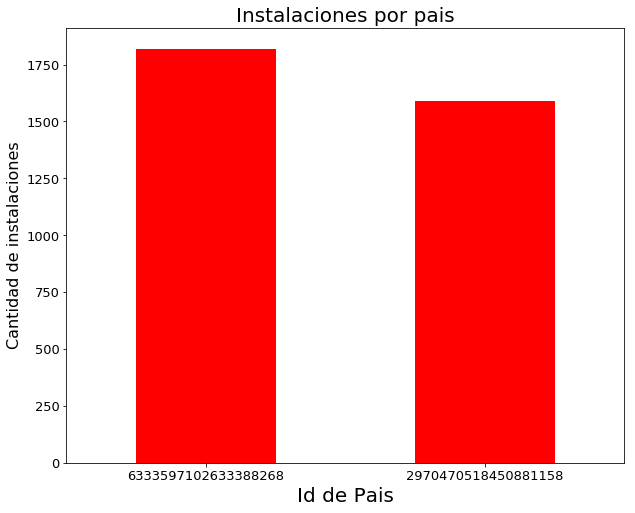

In [150]:
dfInstalls.groupby('device_countrycode')['total'].count().nlargest(2).plot(kind='bar', rot=0, figsize=(10,8) ,fontsize=13, color="Red" );
plt.title('Instalaciones por pais', fontsize=20);
plt.ylabel('Cantidad de instalaciones', fontsize=16);
plt.xlabel('Id de Pais', fontsize=20);

In [151]:
#application_id = internal id for the installed app
dfInstalls['application_id'].unique()

array([ 0,  2,  3,  5,  8,  9, 12, 14, 15, 17, 18, 21, 10, 23, 24, 20,  7,
       26, 28, 30, 16, 32,  6, 33,  1, 29, 13, 34,  4, 36, 19])

In [152]:
dfInstalls['application_id'].value_counts().sort_values(ascending=False).to_frame()

,application_id
7,947
9,731
10,389
16,362
8,328
2,174
29,97
20,95
6,35
1,34


In [153]:
dfInstalls['total'] = 1 

dfInstalls.groupby('application_id')['total'].count().nlargest(5).to_frame()

,total
application_id,
7,947
9,731
10,389
16,362
8,328


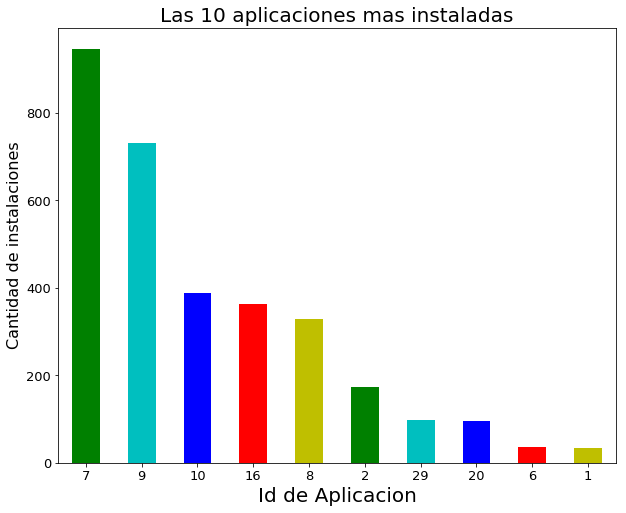

In [154]:
dfInstalls.groupby('application_id')['total'].count().nlargest(10).plot(kind='bar', rot=0, figsize=(10,8) ,fontsize=13, color=["g","c","b","r","y"] );

plt.title('Las 10 aplicaciones mas instaladas', fontsize=20);
plt.ylabel('Cantidad de instalaciones', fontsize=16);
plt.xlabel('Id de Aplicacion', fontsize=20);

In [155]:
dfInstalls['device_brand'].unique()


[3.083058605577787e+17, 5.1379920467642125e+17, 1.083368711068078e+18, 2.208834667126999e+18, 2.987569314309514e+18, ..., 8.285870045665421e+18, 4.994101372019545e+18, 2.7488313570525307e+18, 5.189983387744444e+18, 7.855185525087771e+18]
Length: 28
Categories (27, object): [3.083058605577787e+17, 5.1379920467642125e+17, 1.083368711068078e+18, 2.208834667126999e+18, ..., 4.994101372019545e+18, 2.7488313570525307e+18, 5.189983387744444e+18, 7.855185525087771e+18]

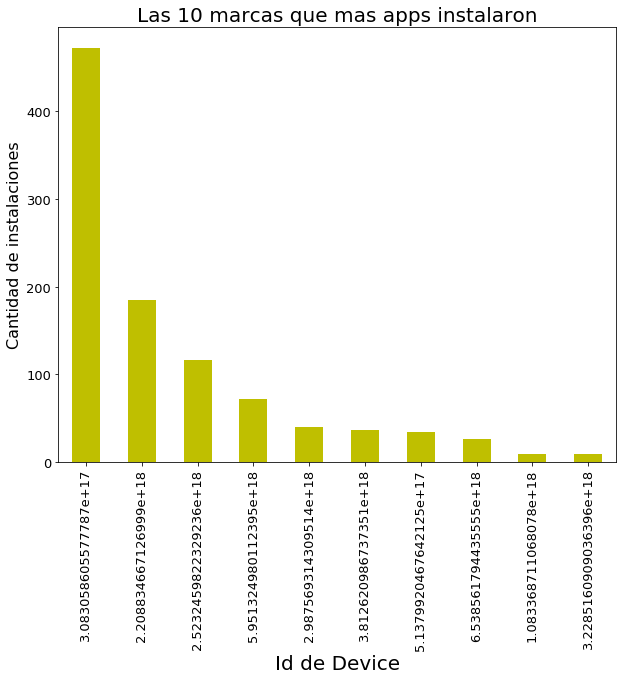

In [156]:
dfInstalls.groupby('device_brand')['total'].count().nlargest(10).plot(kind='bar', rot=90, figsize=(10,8) ,fontsize=13, color=["y"] );

plt.title('Las 10 marcas que mas apps instalaron', fontsize=20);
plt.ylabel('Cantidad de instalaciones', fontsize=16);
plt.xlabel('Id de Device', fontsize=20);

In [157]:
dfInstalls['device_model'].unique()


array([4.44525231e+18, 6.02654333e+18, 7.87661184e+18, 9.17974343e+18,
       7.55168472e+17, 8.65685449e+18, 2.06643138e+17, 5.39086773e+18,
       4.54763144e+17, 7.39894346e+18, 9.10946553e+18, 1.63290203e+18,
       3.38623015e+18, 2.18597574e+18, 6.68496614e+18, 3.86184401e+18,
       2.61622807e+18, 8.60412220e+18, 8.24021333e+18, 5.18500511e+18,
       3.68606666e+17, 5.51360850e+18, 4.28172933e+18, 5.80720383e+18,
       3.05740232e+18, 8.16378269e+18, 2.22143007e+18, 1.75452786e+18,
       5.53837469e+18, 5.18930913e+18, 7.64786244e+18, 9.17762562e+18,
       3.03554279e+18, 6.56124976e+17, 3.40961417e+18, 7.36818507e+18,
       4.80146669e+18, 9.09844315e+18, 1.94620040e+18, 7.28615637e+17,
       4.36808096e+18, 5.96089585e+18, 3.28518427e+18, 3.39434674e+18,
       5.97183731e+18, 7.31374813e+18, 2.81009878e+17, 3.26222239e+18,
       6.64203503e+18, 5.07819823e+18, 1.93530538e+18, 6.31896423e+18,
       3.60644740e+18, 4.43057869e+18, 7.27275138e+18, 7.11634310e+18,
      

In [158]:
dfInstalls.groupby('device_model')['total'].count().nlargest(10).to_frame()

,total
device_model,
2.331947e+18,759
6.882415e+18,276
2.616228e+18,76
7.787531e+18,65
2.928262e+18,63
9.149036e+18,56
1.187661e+17,55
1.267677e+18,53
5.990117e+18,46


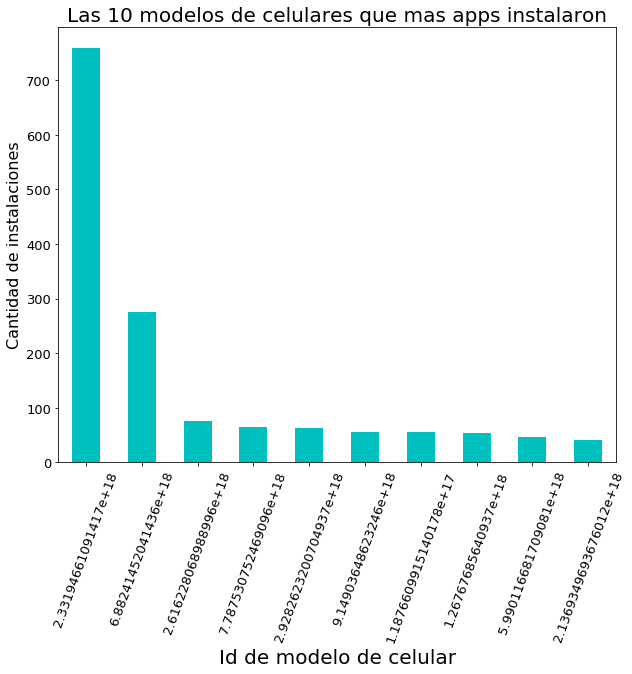

In [159]:
dfInstalls.groupby('device_model')['total'].count().nlargest(10).plot(kind='bar', rot=70, figsize=(10,8) ,fontsize=13, color=["c"] );

plt.title('Las 10 modelos de celulares que mas apps instalaron', fontsize=20);
plt.ylabel('Cantidad de instalaciones', fontsize=16);
plt.xlabel('Id de modelo de celular', fontsize=20);

# ¿Cuales son los dispositivos y marcas desde las cuales se instalaron más apps?

In [160]:
dfInstalls.groupby(['device_brand','device_model'])['total'].count().to_frame().sort_values(by=['total'],ascending=False)

total
device_brand           device_model       
3.083058605577787e+17  7.787531e+18     37
                       9.098443e+18     36
                       7.116343e+18     36
                       2.066431e+17     31
                       1.754528e+18     22
2.208834667126999e+18  6.642035e+18     19
2.5232459822329236e+18 8.604122e+18     18
2.208834667126999e+18  4.801467e+18     17
2.5232459822329236e+18 4.430579e+18     17
2.208834667126999e+18  9.109466e+18     17
                       3.057402e+18     16
3.083058605577787e+17  4.445252e+18     16
2.208834667126999e+18  7.313748e+18     14
3.083058605577787e+17  5.990117e+18     14
                       6.293339e+18     14
                       3.409614e+18     13
                       8.163783e+18     12
                       5.165982e+18     12
2.208834667126999e+18  4.331891e+18     11
3.083058605577787e+17  2.221430e+18     11
                       4.281729e+18     10
2.5232459822329236e+18 1.353619e+18      9
3.083058605577787e+17  5.112505e+16      9
2.5232459822329236e+18 6.452552e+18      9
3.083058605577787e+17  2.435450e+18      9
2.208834667126999e+18  1.935305e+18      9
2.5232459822329236e+18 2.185976e+18      9
3.083058605577787e+17  6.543766e+18      9
5.1379920467642125e+17 8.733769e+18      9
3.083058605577787e+17  5.971837e+18      8
...                                    ...
                       1.331521e+18      1
3.093165991971729e+18  6.318964e+18      1
3.1722313865184384e+18 2.775824e+18      1
3.2285160909036396e+18 1.464153e+18      1
4.371307750970993e+18  3.504080e+18      1
2.5232459822329236e+18 5.130053e+18      1
4.371307750970993e+18  7.286156e+17      1
3.083058605577787e+17  5.716109e+18      1
3.8494904260895846e+18 7.074462e+18      1
2.5232459822329236e+18 5.440774e+18      1
                       5.777564e+18      1
3.812620986737351e+18  7.543907e+18      1
2.5232459822329236e+18 6.764099e+18      1
2.7488313570525307e+18 4.453839e+18      1
2.987569314309514e+18  2.068439e+18      1
3.812620986737351e+18  5.036728e+18      1
                       3.641248e+18      1
                       3.237075e+18      1
                       2.975501e+18      1
2.987569314309514e+18  6.607033e+18      1
                       7.484577e+18      1
3.812620986737351e+18  9.822090e+17      1
3.083058605577787e+17  7.252441e+16      1
3.624089450035605e+18  4.005443e+18      1
3.2285160909036396e+18 6.781272e+18      1
                       6.137234e+18      1
                       5.538375e+18      1
                       3.035543e+18      1
3.083058605577787e+17  8.676168e+17      1
9.169526525480201e+18  8.908239e+18      1

[267 rows x 1 columns]

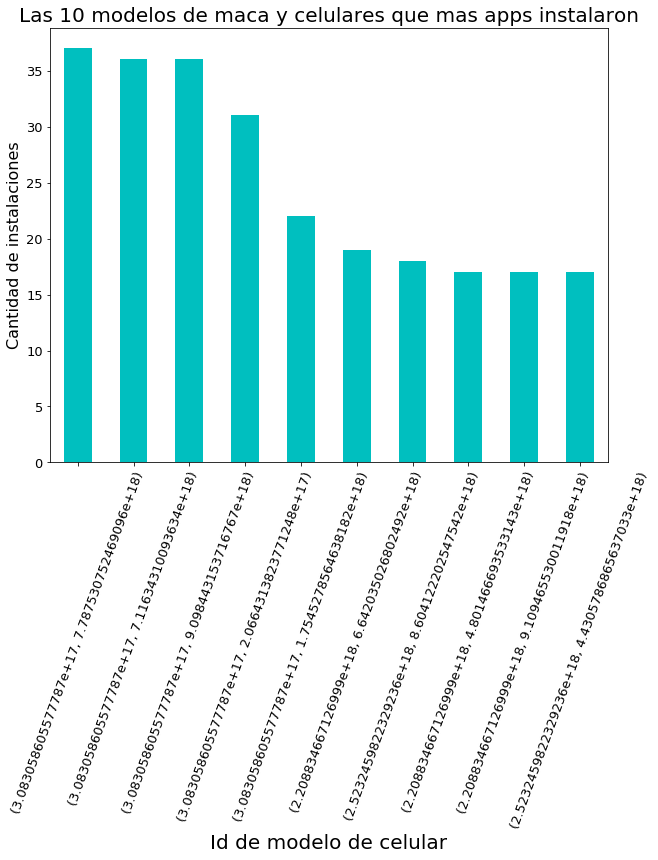

In [161]:
dfInstalls.groupby(['device_brand','device_model'])['total'].count().nlargest(10).plot(kind='bar',stacked=True, rot=70, figsize=(10,8) ,fontsize=13, color=["c"] );

plt.title('Las 10 modelos de maca y celulares que mas apps instalaron', fontsize=20);
plt.ylabel('Cantidad de instalaciones', fontsize=16);
plt.xlabel('Id de modelo de celular', fontsize=20);
plt.show()

In [162]:
dfInstalls_gropuby = dfInstalls.groupby(['device_brand','device_model'])['total'].count()
dfInstalls_gropuby

device_brand           device_model
1.083368711068078e+18  7.551685e+17     2
                       2.442643e+18     1
                       4.374400e+18     1
                       4.403137e+18     1
                       4.699288e+18     2
                       7.876612e+18     2
2.208834667126999e+18  3.037516e+17     3
                       1.323701e+18     2
                       1.846765e+18     2
                       1.935305e+18     9
                       2.243359e+18     1
                       2.459447e+18     1
                       2.510073e+18     8
                       3.057402e+18    16
                       3.861844e+18     7
                       4.073186e+18     1
                       4.331891e+18    11
                       4.444254e+18     3
                       4.801467e+18    17
                       5.078198e+18     6
                       5.268998e+18     1
                       5.390868e+18     1
                       5.513608e+18     

In [165]:
dfPivot = dfInstalls_gropuby.reset_index().pivot(index='device_brand', columns='device_model', values='total')
dfPivot = dfPivot.fillna(0)


In [166]:
dfPivot.head(10)

device_model,5.112505082776814e+16,7.252441190833806e+16,1.1876609915140178e+17,2.0664313823771248e+17,2.0914334311789427e+17,2.642580801770593e+17,2.8100987846548262e+17,3.0375155629570515e+17,3.686066659168077e+17,4.547631435014992e+17,...,9.096051274919873e+18,9.098443153716767e+18,9.109465530011918e+18,9.14903648623246e+18,9.158813849764273e+18,9.177625620767357e+18,9.179743425365875e+18,9.217611382479208e+18,9.221733410395375e+18,9.222450236218317e+18
device_brand,,,,,,,,,,,,,,,,,,,,,
1.083368711068078e+18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2.208834667126999e+18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,17.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2.262848417324907e+18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2.5232459822329236e+18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2.7488313570525307e+18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2.987569314309514e+18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.083058605577787e+17,9.0,1.0,0.0,31.0,2.0,0.0,5.0,0.0,7.0,0.0,...,1.0,36.0,0.0,0.0,0.0,3.0,1.0,0.0,6.0,0.0
3.093165991971729e+18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.1722313865184384e+18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


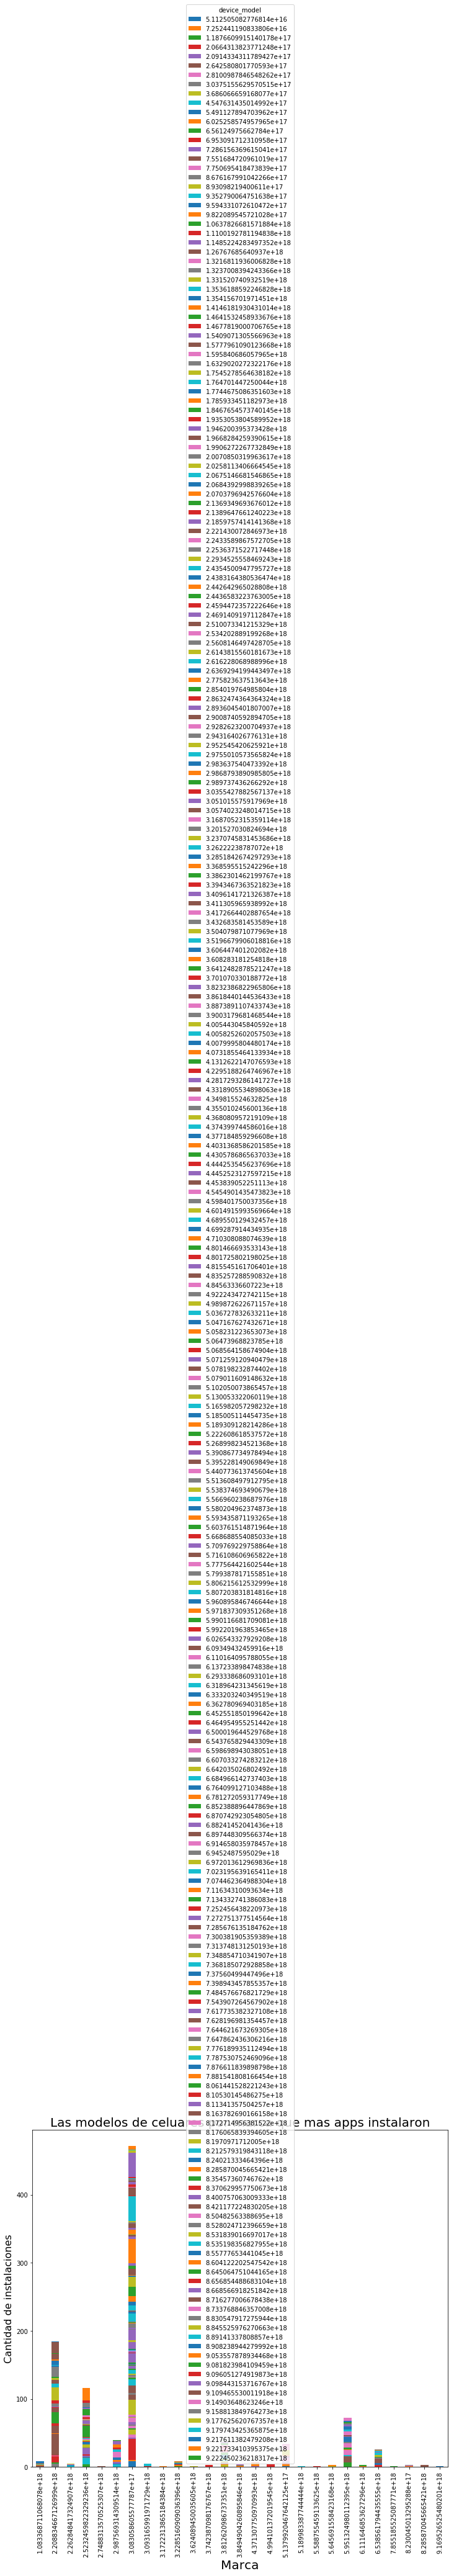

In [115]:
colors = ["#006D2C", "#31A354","#74C476"]
dfPivot.plot.bar(stacked=True, figsize=(12,10))
plt.title('Las modelos de celuares por marca que mas apps instalaron', fontsize=20);
plt.ylabel('Cantidad de instalaciones', fontsize=16);
plt.xlabel('Marca', fontsize=20);
plt.show()

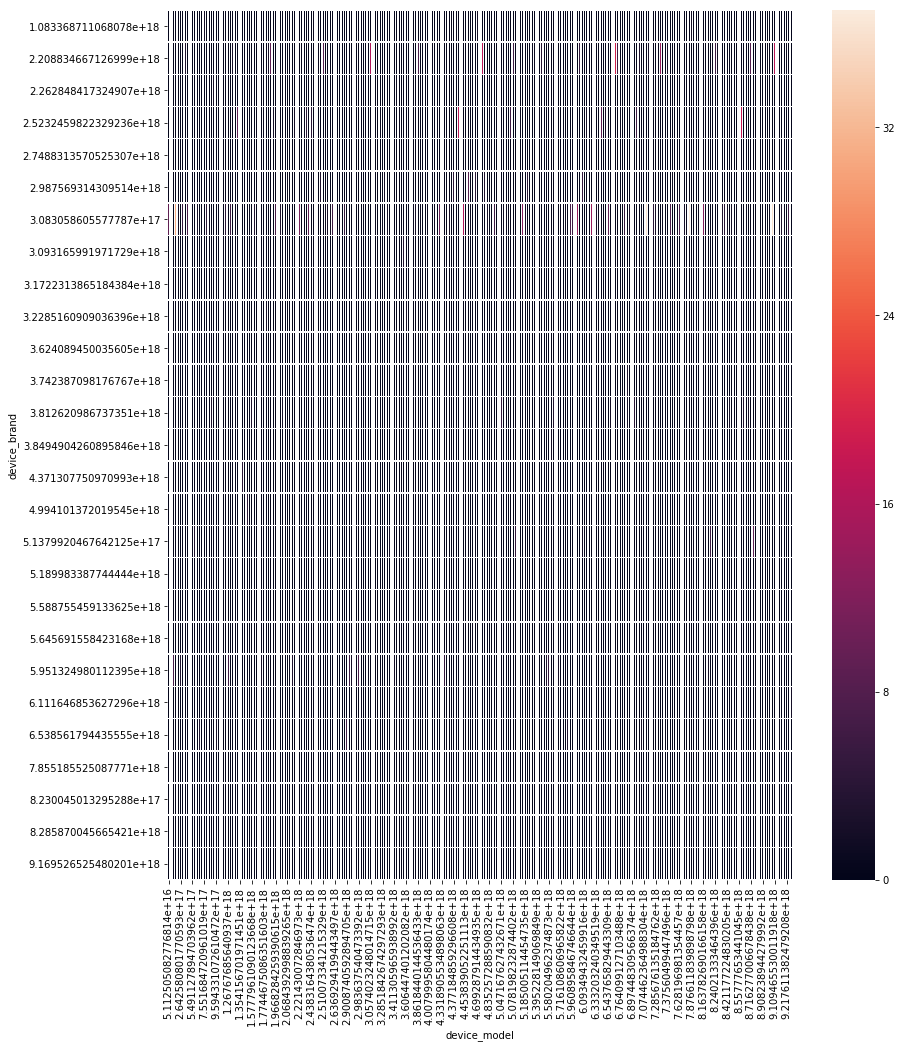

In [172]:
fig, ax = plt.subplots(figsize=(14,16))         # Sample figsize in inches
sns.heatmap(dfPivot, annot=False, linewidths=.5010, ax=ax); #linewidths=.00010,

# Heatmap del set de datos

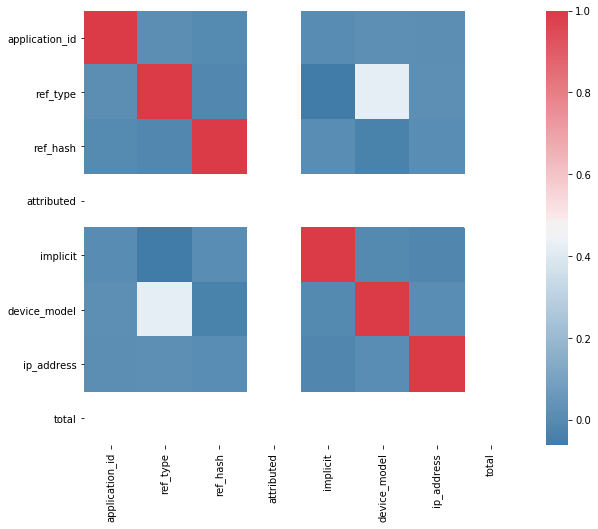

In [71]:
f, ax = plt.subplots(figsize=(10, 8)) 
corr = dfInstalls.corr() 
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240, 10, as_cmap=True), 
      square=True, ax=ax) 

Aqui observamos que attributed no tiene correlacion con los demas datos.